In [1]:
#libraries needed for this program
import sys
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from pyspark import SparkContext
from os import path
import matplotlib.pyplot as plt

In [2]:
#function to remove charectors from words
def charRemoveFromString(x):
    cleanString = ''.join(filter(str.isalnum, x)) 
    return cleanString

In [3]:
# create Spark context with necessary configuration
sc = SparkContext("local","PySpark Word Count Exmaple")
stopWords=stopwords.words('english')
stopWords.append('')

21/10/02 02:04:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
# read data from text file and split each line into words and removing stop words
nyt = sc.textFile("/Users/venkatavarunnelakuditi/Desktop/input.txt").flatMap(lambda line: line.split(" ")).map(lambda x: x.strip()).map(lambda x: charRemoveFromString(x)).map(lambda x:x.lower()).filter(lambda x: x not in stopWords)

In [5]:
# count the occpythurrence of each word
wordCounts = nyt.map(lambda word: (word, 1)).reduceByKey(lambda a,b:a +b).map(lambda a:[a[1],a[0]]).sortByKey(False)
#spark file attached in the git
wordCounts.saveAsTextFile("/Users/venkatavarunnelakuditi/Desktop/spark")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


In [6]:
#making a list of top 100 words
wordCounts=wordCounts.take(100)

In [7]:
wordFrequency=dict()
for x in wordCounts:
    wordFrequency[x[1]]=x[0]
#print(wordFrequency)

In [8]:
#generating word cloud
wc = WordCloud().generate_from_frequencies(dict(wordFrequency))

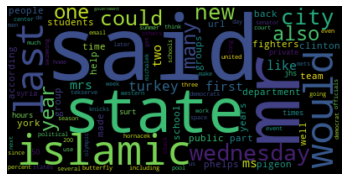

In [9]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()